#### <ins>algorithm for Kohonen's Self Organizing Maps:</ins>
1. Initialize neural network weights
2. Select an input
3. Select the winning neuron using Euclidean distance
4. Update the neurons
5. Repeat steps 2-4 until done

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### <ins>Initializing neural network weights</ins>

In [294]:
def create_data(sample_num):
    data = {}
    for i in range(sample_num):
        x, y = np.random.uniform(size=2)
        while (x-0.5)**2 + (y-0.5)**2 > 0.25:
            x, y = np.random.uniform(size=2)
        data.update({i: (x, y)})
    
    return data

def create_neurons(neurons_num):
    neurons = {}
    for i in range(neurons_num):
        neurons.update({i: [0.45 + i/neurons_num * 0.1, 0.5]})
    
    return neurons

#### <ins>Updating Neurons</ins>

##### formula for Euclidean distance between points p and q with n elements:

$d(p, q) = \sqrt {\sum \limits _{i=1} ^{n} (p_i - q_i)^2} $

In [279]:
# Selecting the winning neuron - the closest neuron via Euclidean distance
def decide_winner(p, N):
    min_dist = float("inf")
    winner_index = 0
    # going over all neurons
    for n in N.keys():
        dist = 0
        # going over all elements
        for i in range(len(p)):
            dist += (p[i] - N[n][i])**2
        # formula for Euclidean distance
        dist = math.sqrt(dist)
        # updating the current winner
        if dist < min_dist:
            winner_index = n
            min_dist = dist
    return winner_index

#### formula for updating the weights:

$\Delta W_{j,i} = \alpha(t)\cdot h_{j,c}(t)\cdot(X_i-W_{j,i})$

##### definitions:

$t$ := current epoch \
$i$ := an element \
$j$ := a neuron's index \
$c$ := the winning neuron's index \
$X$ := current input vector \
$\alpha(t) = \alpha _0\cdot\Big(1-\displaystyle\frac{t}{\tau}\Big)$ := learning rate at epoch t \
\
$\sigma(t) = \sigma _0\cdot\Big(1-\displaystyle\frac{t}{\tau}\Big)$ := neighborhood size at epoch t \
\
$r(t) = round(r_0\cdot\Big(1-\displaystyle\frac{t}{\tau}\Big))$ := neighborhood index radius at epoch t \
$h_{j,c}(t) = e^{\Big(-\displaystyle\frac{(c-j)^2}{2\sigma(t)^2}\Big)}$ := topological neighborhood at epoch t 

##### hyperparameters:

$\alpha _0$ := initial learning_rate \
$\sigma _0$ := initial neighborhood size \
$r_0$ := initial neighborhood radius \
$\tau$ := total iterations (epoches)

In [280]:
# N := all neurons
# c := winning neuron's index
# X := current input
# alpha := current learning rate
# sigma := current neighborhood size
# radius := current neighborhood radius
def update_weights(N, c, X, alpha, sigma, radius):
    # go over all neurons with index in radius r from the winning neuron
    for j in range(c-radius, c+radius+1):
        # if the index exists:
        if j in N:
            # get current topological neighborhood (will be equal to 1 if the neuron is the winner)
            h = math.exp(-((c - j)**2)/(2*(sigma**2)))
            # go over all elements
            for i in range(len(X)):
                # update weight according to the formula
                N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    # return the new weights
    return N

$P$ := input vectors \
$N$ := neurons

#### <ins>Training 100 neurons in a topology of a line:</ins>

In [281]:
P = create_data(1000)
N = create_neurons(100)

# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2

In [282]:
def display(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])

    nx, ny = [], []
    for i in N.keys():
        nx.append(N[i][0])
        ny.append(N[i][1])

    plt.plot(px, py, 'ro')
    plt.plot(nx, ny, 'bo-')
    plt.title("epoch = " + str(t))
    plt.show()

In [283]:
def train(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display(P, N, t)
        # going over all input vectors
        for p in range(len(P)):
            # update alpha, sigma, and radius
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            # check the winning neuron
            c = decide_winner(P[p], N)
            # update the weights
            N = update_weights(N, c, P[p], alpha, sigma, radius)

    display(P, N, epoches)

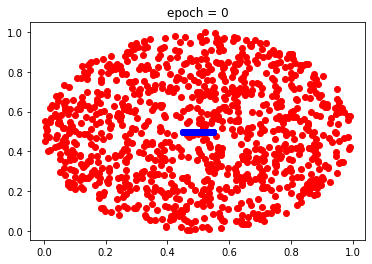

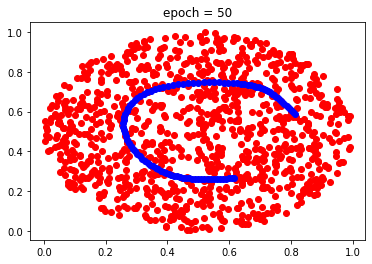

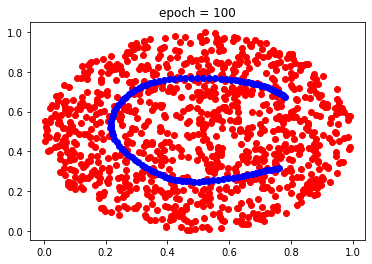

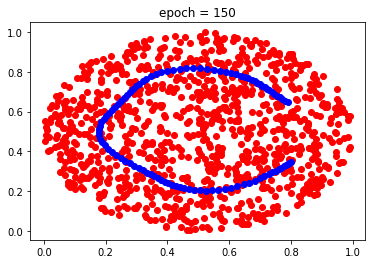

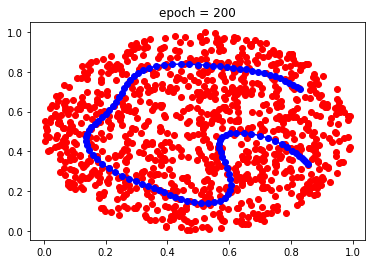

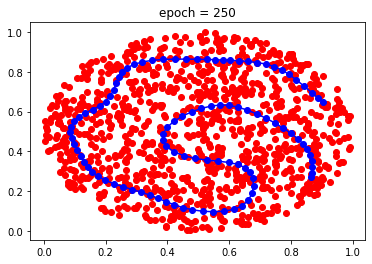

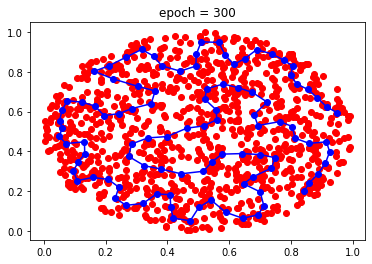

In [284]:
train(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

As we can see, as the number of iterations (epoches) increases, the spaces between the neurons becomes larger as they try the spread across the entire shape. There are more curves and they become sharper.

#### <ins>Training 100 neurons in a topology of a 10x10 matrix:</ins>

In [295]:
def create_neurons_2D(sqrt_neurons_num):
    neurons = {}
    for i in range(sqrt_neurons_num):
        for j in range(sqrt_neurons_num):
            neurons.update({(i, j): [0.45 + i*(0.1/sqrt_neurons_num), 0.45 + j*(0.1/sqrt_neurons_num)]})
    
    return neurons

def update_weights_2D(N, c, X, alpha, sigma, radius):
    # go over all neurons:
    for j in N.keys():
        # if neuron is within radius of the winner:
        if (j[0]-c[0])**2 + (j[1]-c[1])**2 < radius**2:
            # get current topological neighborhood (will be equal to 1 if the neuron is the winner)
            S = (c[0] - j[0])**2 + (c[1] - j[1])**2
            h = math.exp(-(S)/(2*(sigma**2)))
            # go over all elements
            for i in range(len(X)):
                # update weight according to the formula
                N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    # return the new weights
    return N

def display_2D(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])
    plt.plot(px, py, 'ro')

    for i in range(int(math.sqrt(len(N)))):
        nx, ny = [], []
        for j in range(int(math.sqrt(len(N)))):
            nx.append(N[(i, j)][0])
            ny.append(N[(i, j)][1])
        plt.plot(nx, ny, 'bo-')
        nx, ny = [], []
        for j in range(int(math.sqrt(len(N)))):
            nx.append(N[(j, i)][0])
            ny.append(N[(j, i)][1])
        plt.plot(nx, ny, 'bo-')

    plt.title("epoch = " + str(t))
    plt.show()

def train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display_2D(P, N, t)
        # going over all input vectors
        for p in range(len(P)):
            # update alpha, sigma, and radius
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            # check the winning neuron
            c = decide_winner(P[p], N)
            # update the weights
            N = update_weights_2D(N, c, P[p], alpha, sigma, radius)

    display_2D(P, N, epoches)

In [296]:
P = create_data(1500)
N = create_neurons_2D(10)

# find best variables
epoches = 300
learning_rate = 0.1
neighborhood_size = 5
neighborhood_radius = math.sqrt(len(N))/2

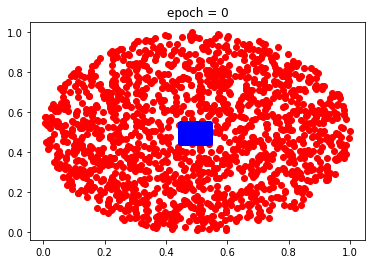

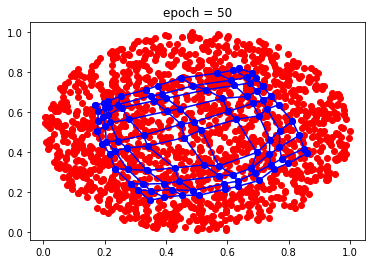

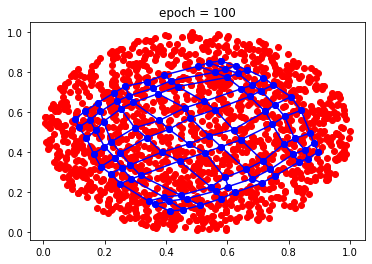

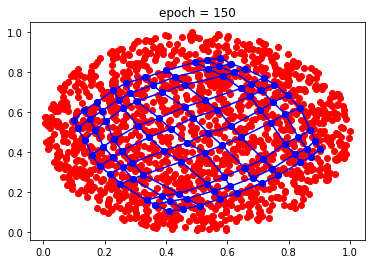

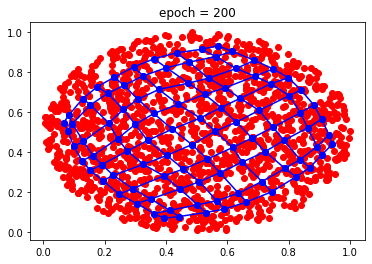

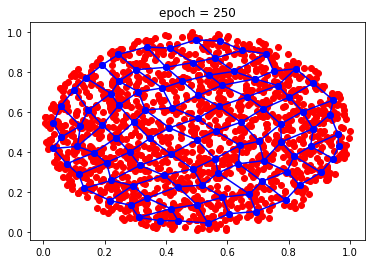

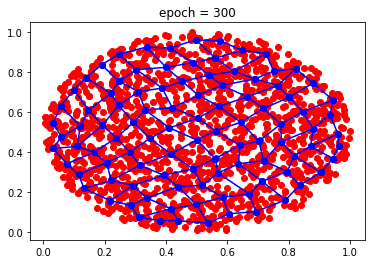

In [297]:
train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

Here, as the number of iteration increases, the 10x10 matrix expands, starting with its middle and gradually spreading the rest to the edges of the shape.